In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
unshape=pd.read_csv("/content/1.ushape.csv")

In [6]:
unshape=unshape.rename(columns={"3.159499363321345566e-02":"c1","9.869877579082642072e-01":"c2","0.000000000000000000e+00":"y"})

In [7]:
unshape

c1        c2    y
0   2.115098 -0.046244  1.0
1   0.882490 -0.075756  0.0
2  -0.055144 -0.037332  1.0
3   0.829545 -0.539321  1.0
4   2.112857  0.662084  1.0
..       ...       ...  ...
94  1.699453  0.587720  1.0
95  0.218623 -0.652521  1.0
96  0.952914 -0.419766  1.0
97 -1.318500  0.423112  0.0
98 -1.296818  0.184147  0.0

[99 rows x 3 columns]

In [8]:
# @title c1 vs c2

from matplotlib import pyplot as plt
unshape.plot(kind='scatter', x='c1', y='c2', s=32,c="y", alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
fv=unshape.iloc[:,0:2]

In [10]:
cv=unshape.iloc[:,-1]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(fv.values,(cv.values).astype(np.int_))

KNeighborsClassifier(n_neighbors=1)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10 ,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)



In [13]:
k=[]
acc=[]
err=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    predicted=model.predict(x_test)

    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))


Text(0.5, 1.0, 'k vs accuracy')

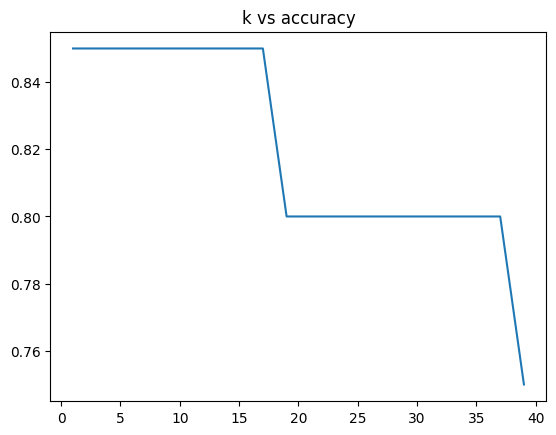

In [14]:
plt.plot(k,acc)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

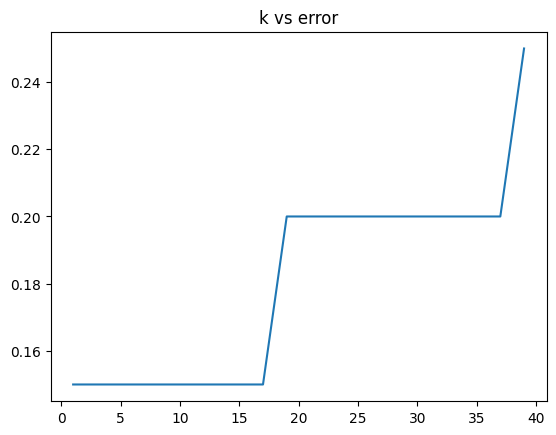

In [15]:
plt.plot(k,err)
plt.title("k vs error")

**Here the accuracy score is max when K neighbor is 15**

<Axes: >

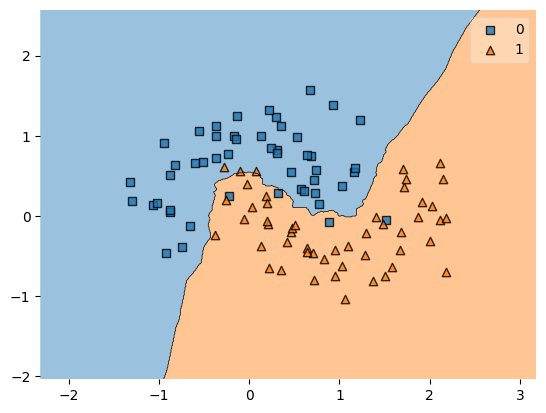

In [16]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

In [17]:
k1=[]
acc_cv=[]
err_cv=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_trainf,y_trainf)
    predicted=model.predict(x_cv)

    k1.append(i)
    acc_cv.append(accuracy_score(y_cv,predicted))
    err_cv.append(1-accuracy_score(y_cv,predicted))


Text(0.5, 1.0, 'K vs acc_cv ')

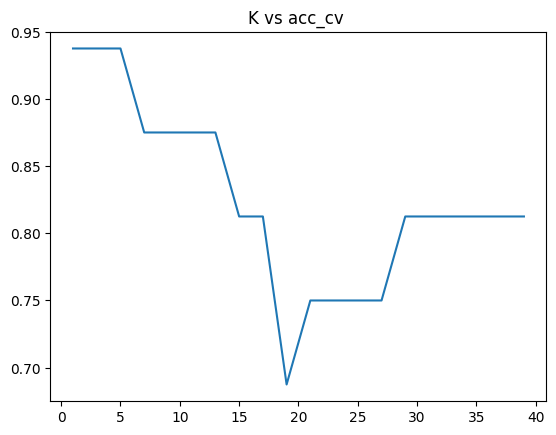

In [18]:
plt.plot(k1,acc_cv)
plt.title("K vs acc_cv ")

<Axes: >

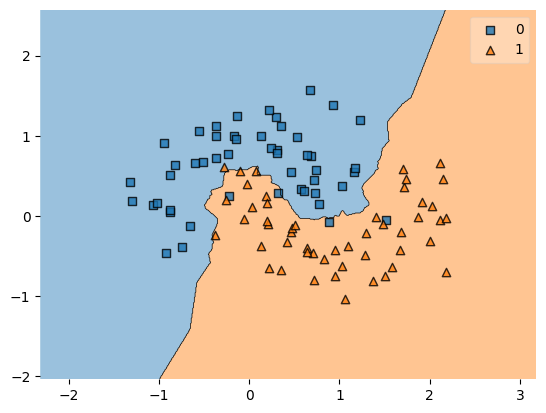

In [19]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values, y=cv.values.astype(np.int_), clf=knn)

Here the generalised accuracy score is good when the k is **1**

Text(0.5, 1.0, 'K vs err_cv ')

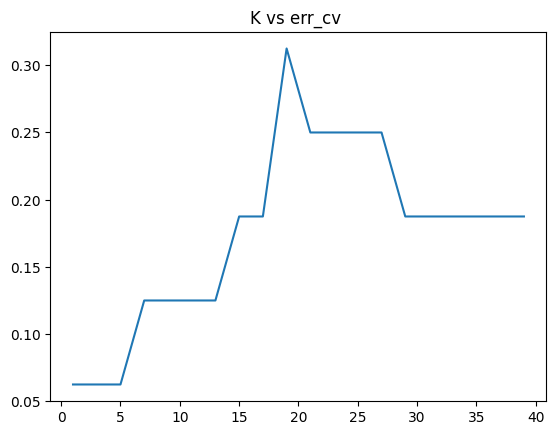

In [20]:
plt.plot(k1,err_cv)
plt.title("K vs err_cv ")

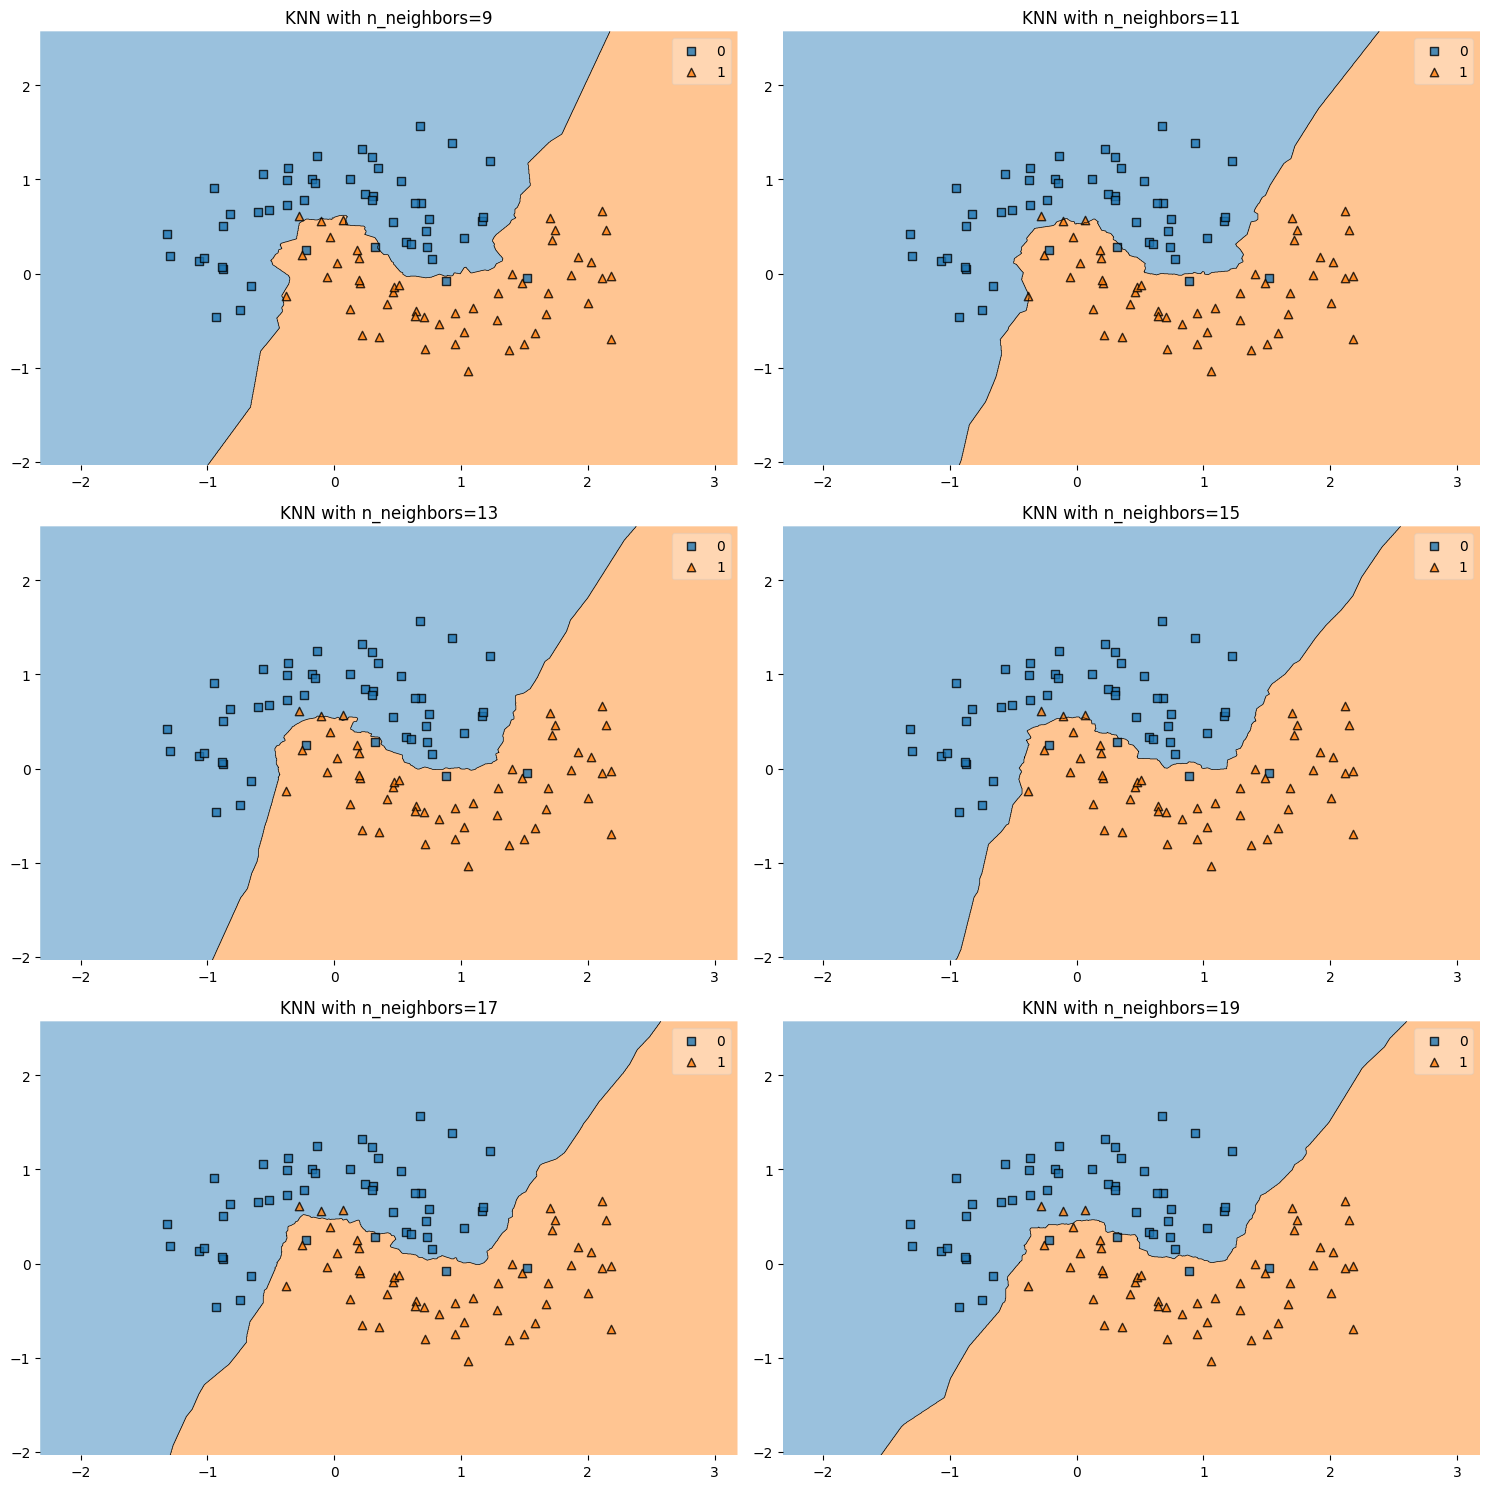

In [21]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [22]:
con=pd.read_csv("/content/2.concerticcir1.csv")

In [23]:
con=con.rename(columns={"-3.828911738602102099e-01":"c1","-9.084004237811005300e-02":"c2","1.000000000000000000e+00":"y"})

In [24]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      99 non-null     float64
 1   c2      99 non-null     float64
 2   y       99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [25]:
con.describe()

c1         c2          y
count  99.000000  99.000000  99.000000
mean   -0.007114  -0.018566   0.494949
std     0.579507   0.545499   0.502519
min    -1.131849  -1.289427   0.000000
25%    -0.450591  -0.433911   0.000000
50%    -0.020962  -0.023341   0.000000
75%     0.440364   0.426789   1.000000
max     1.129808   1.073060   1.000000

In [26]:
fv=con.iloc[:,0:2]

In [27]:
cv=con.iloc[:,-1]

In [28]:
knn=KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(fv.values,(cv.values).astype(np.int_))

KNeighborsClassifier(n_neighbors=1)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10 ,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)



In [31]:
k=[]
acc=[]
err=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    predicted=model.predict(x_test)

    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))


Text(0.5, 1.0, 'K vs accuracy')

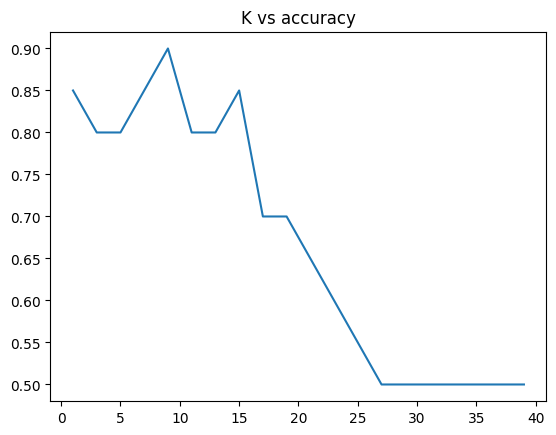

In [32]:
plt.plot(k,acc)
plt.title("K vs accuracy")

Text(0.5, 1.0, 'K vs error')

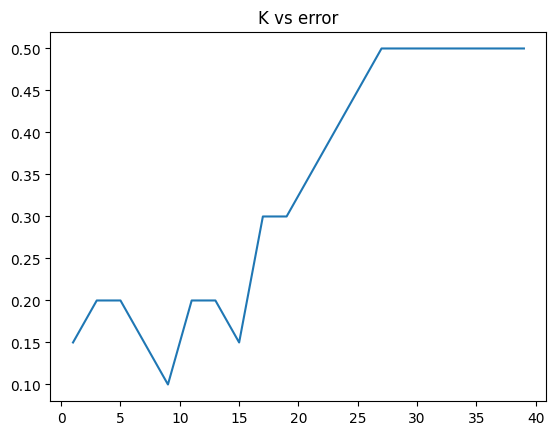

In [33]:
plt.plot(k,err)
plt.title("K vs error")

In [34]:
k1=[]
acc_cv=[]
err_cv=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_trainf,y_trainf)
    predicted=model.predict(x_cv)

    k1.append(i)
    acc_cv.append(accuracy_score(y_cv,predicted))
    err_cv.append(1-accuracy_score(y_cv,predicted))


The generalised accuracy level is high when k is 1

Text(0.5, 1.0, 'k vs accuracy cv')

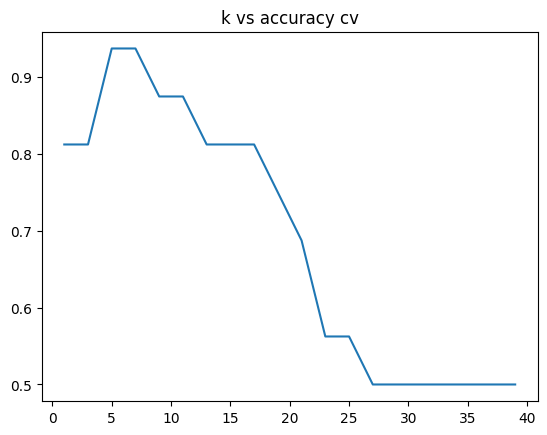

In [35]:
plt.plot(k1,acc_cv)
plt.title("k vs accuracy cv")

Text(0.5, 1.0, 'k vs error cv')

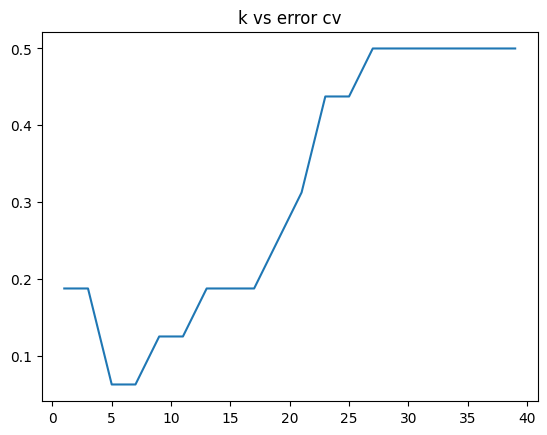

In [36]:
plt.plot(k1,err_cv)
plt.title("k vs error cv")

**Here the accuracy score is max when the knieighbor is 2**

<Axes: >

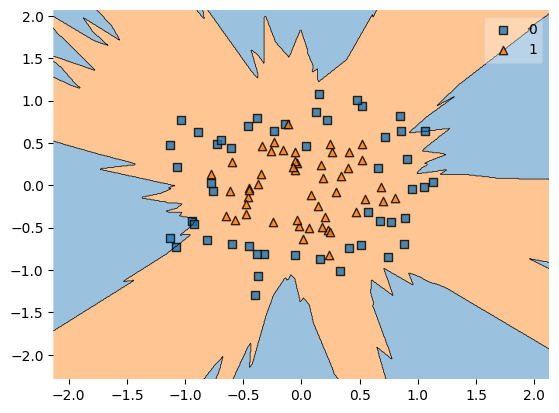

In [37]:
KNeighborsClassifier(n_neighbors=2)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

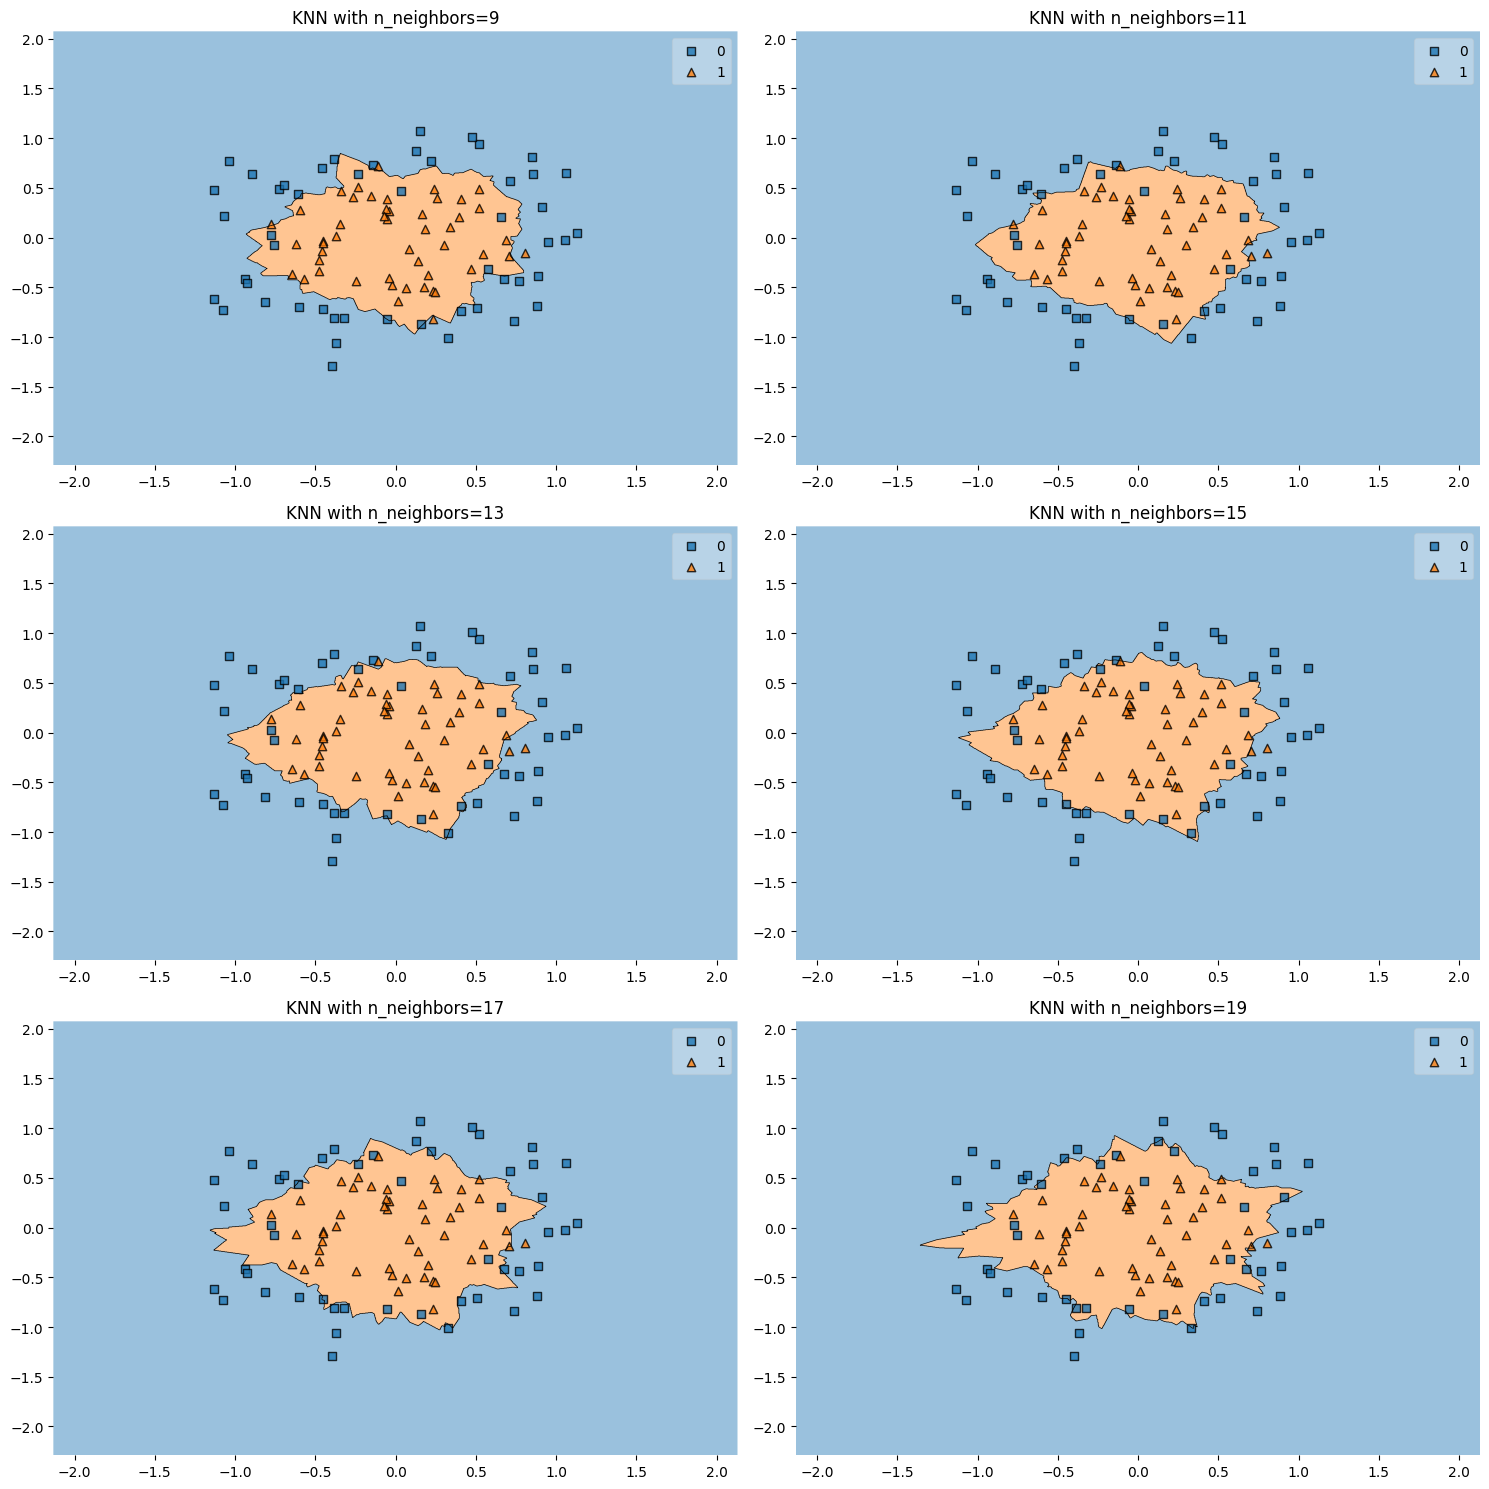

In [38]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [39]:
con2=pd.read_csv("/content/3.concertriccir2.csv")

In [40]:
con2=con2.rename(columns={"7.003345706103683010e-01":"c1","-2.470675778972781789e-01":"c2","0.000000000000000000e+00":"y"})

In [41]:
con2

c1        c2    y
0   -3.950019  2.740080  1.0
1    0.150222 -2.157638  1.0
2   -1.672050 -0.941519  1.0
3    2.560483 -1.846577  1.0
4   -1.724979  3.463930  1.0
..        ...       ...  ...
494  2.177895  2.984489  1.0
495  1.778905  2.869205  1.0
496  0.894180  3.069959  0.0
497  0.849439  3.875435  0.0
498  5.217443  1.400818  0.0

[499 rows x 3 columns]

In [42]:
fv=con2.iloc[:,0:2]
cv=con2.iloc[:,-1]

In [43]:
knn=KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(fv.values,(cv.values).astype(np.int_))

KNeighborsClassifier(n_neighbors=1)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10 ,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)



In [46]:
k=[]
acc=[]
err=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    predicted=model.predict(x_test)

    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))


Text(0.5, 1.0, 'k vs accuracy')

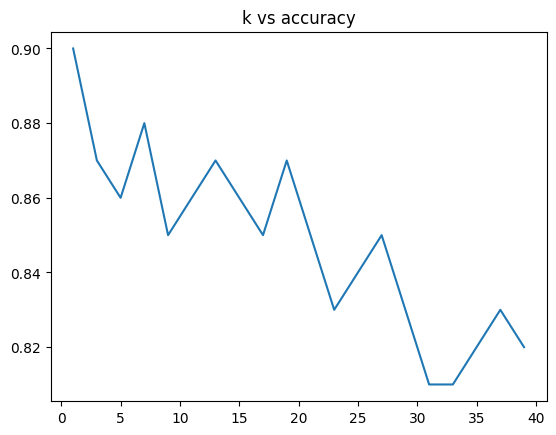

In [47]:
plt.plot(k,acc)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs erroe')

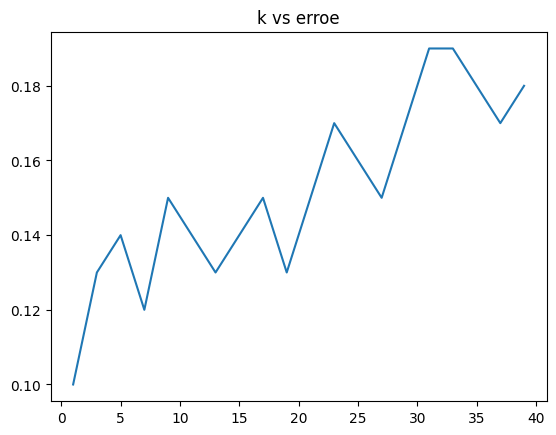

In [48]:
plt.plot(k,err)
plt.title("k vs erroe")

Text(0.5, 1.0, 'k vs accuracy')

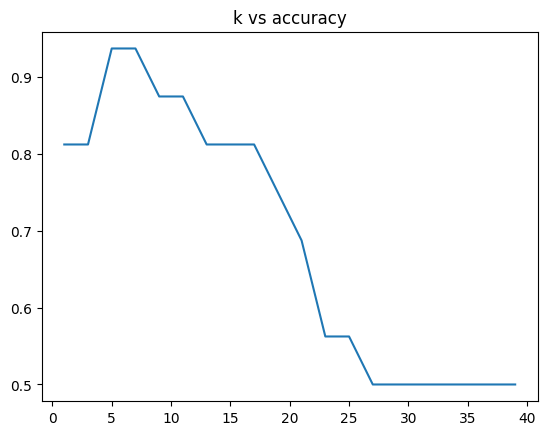

In [49]:
plt.plot(k,acc_cv)
plt.title("k vs accuracy")

**Here the accuracy score is max when the kneighbor is 10**

<Axes: >

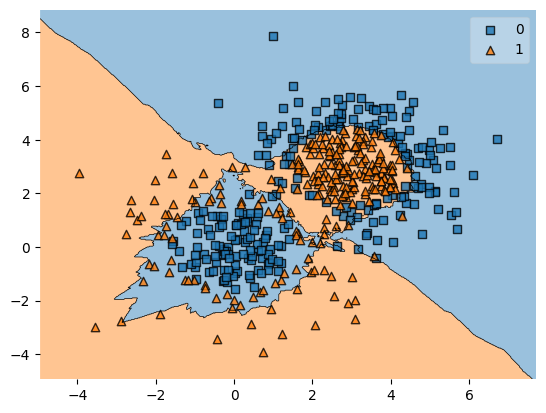

In [50]:
KNeighborsClassifier(n_neighbors=10)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

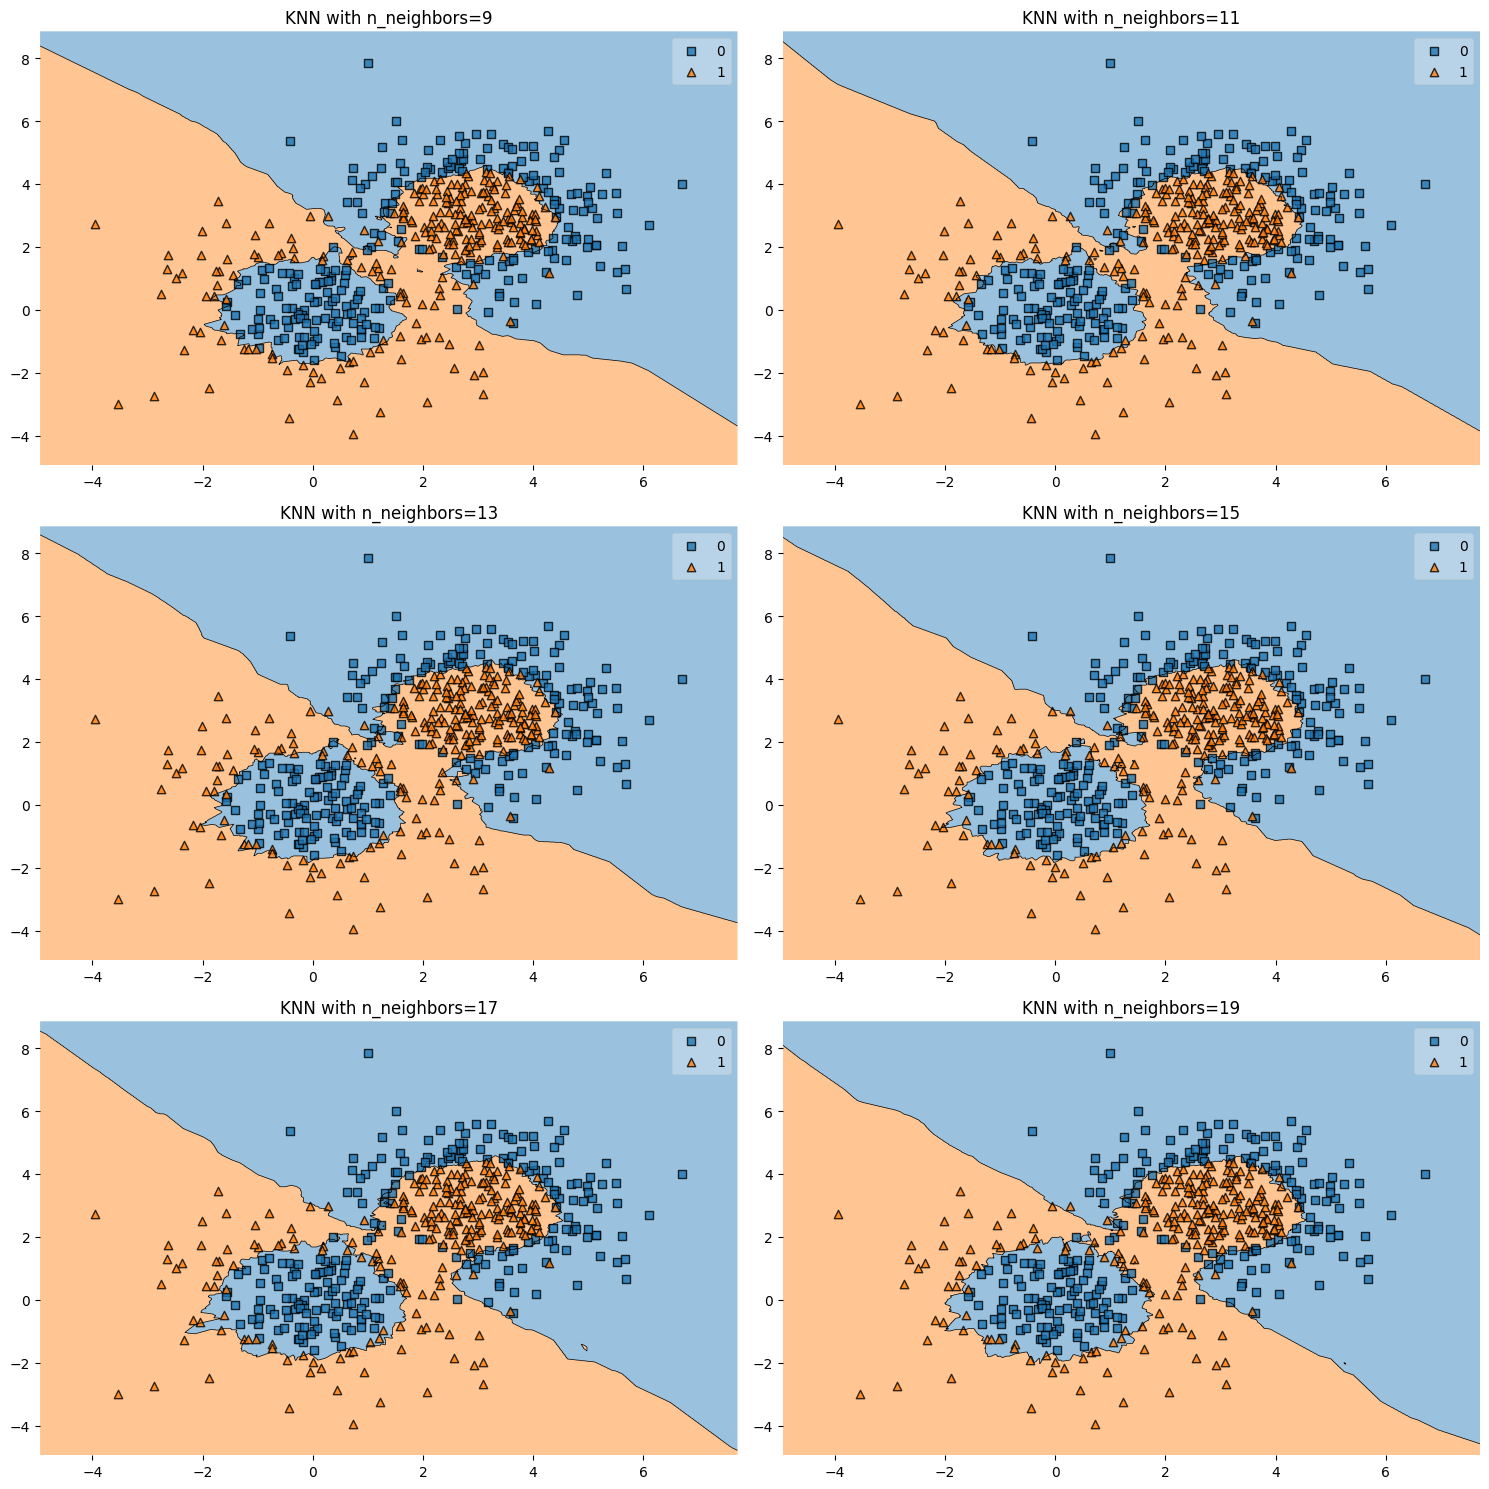

In [51]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'K vs err_cv')

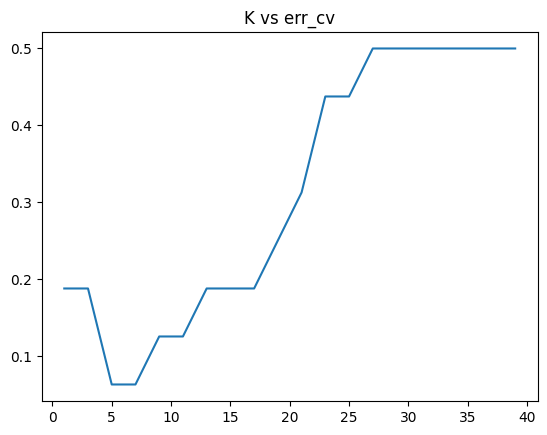

In [52]:
plt.plot(k,err_cv)
plt.title("K vs err_cv")

In [53]:
df4=pd.read_csv("/content/4.linearsep.csv")

In [54]:
df4=df4.rename(columns={"-1.774965779898558527e-01":"c1","9.304962660386675299e-01":"c2","1.000000000000000000e+00":"y1"})

In [55]:
fv=df4.iloc[:,0:2]
cv=df4.iloc[:,-1]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10 ,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)



In [57]:
k=[]
acc=[]
err=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    predicted=model.predict(x_test)

    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))


Text(0.5, 1.0, 'k vs accuracy')

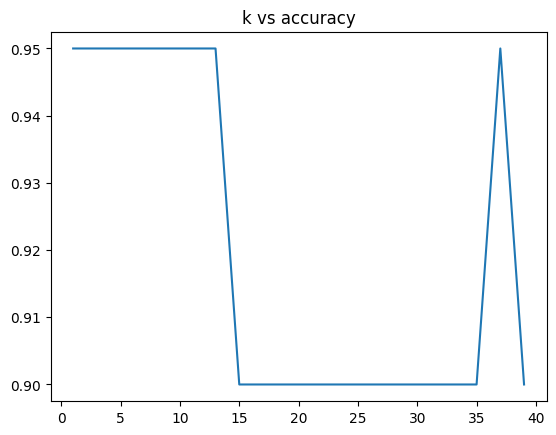

In [58]:
plt.plot(k,acc)
plt.title("k vs accuracy")

In [59]:
k1=[]
acc_cv=[]
err_cv=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_trainf,y_trainf)
    predicted=model.predict(x_cv)

    k1.append(i)
    acc_cv.append(accuracy_score(y_cv,predicted))
    err_cv.append(1-accuracy_score(y_cv,predicted))


Text(0.5, 1.0, 'K vs accuracy')

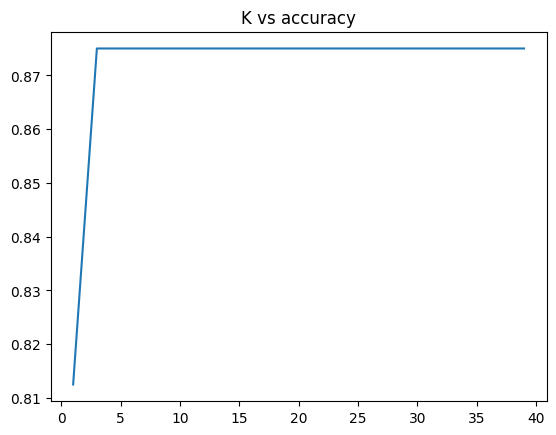

In [60]:
plt.plot(k1,acc_cv)
plt.title("K vs accuracy")

**Here the accuracy score is max when kneighbor is 17**

<Axes: >

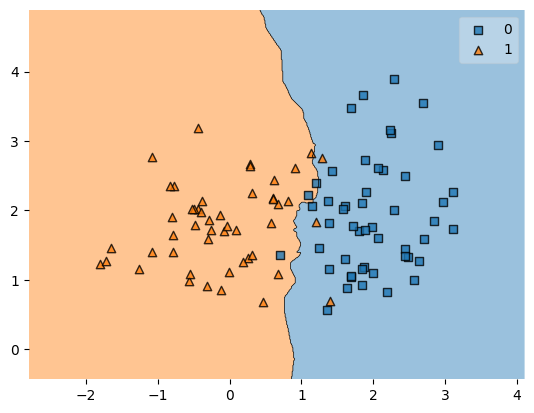

In [61]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

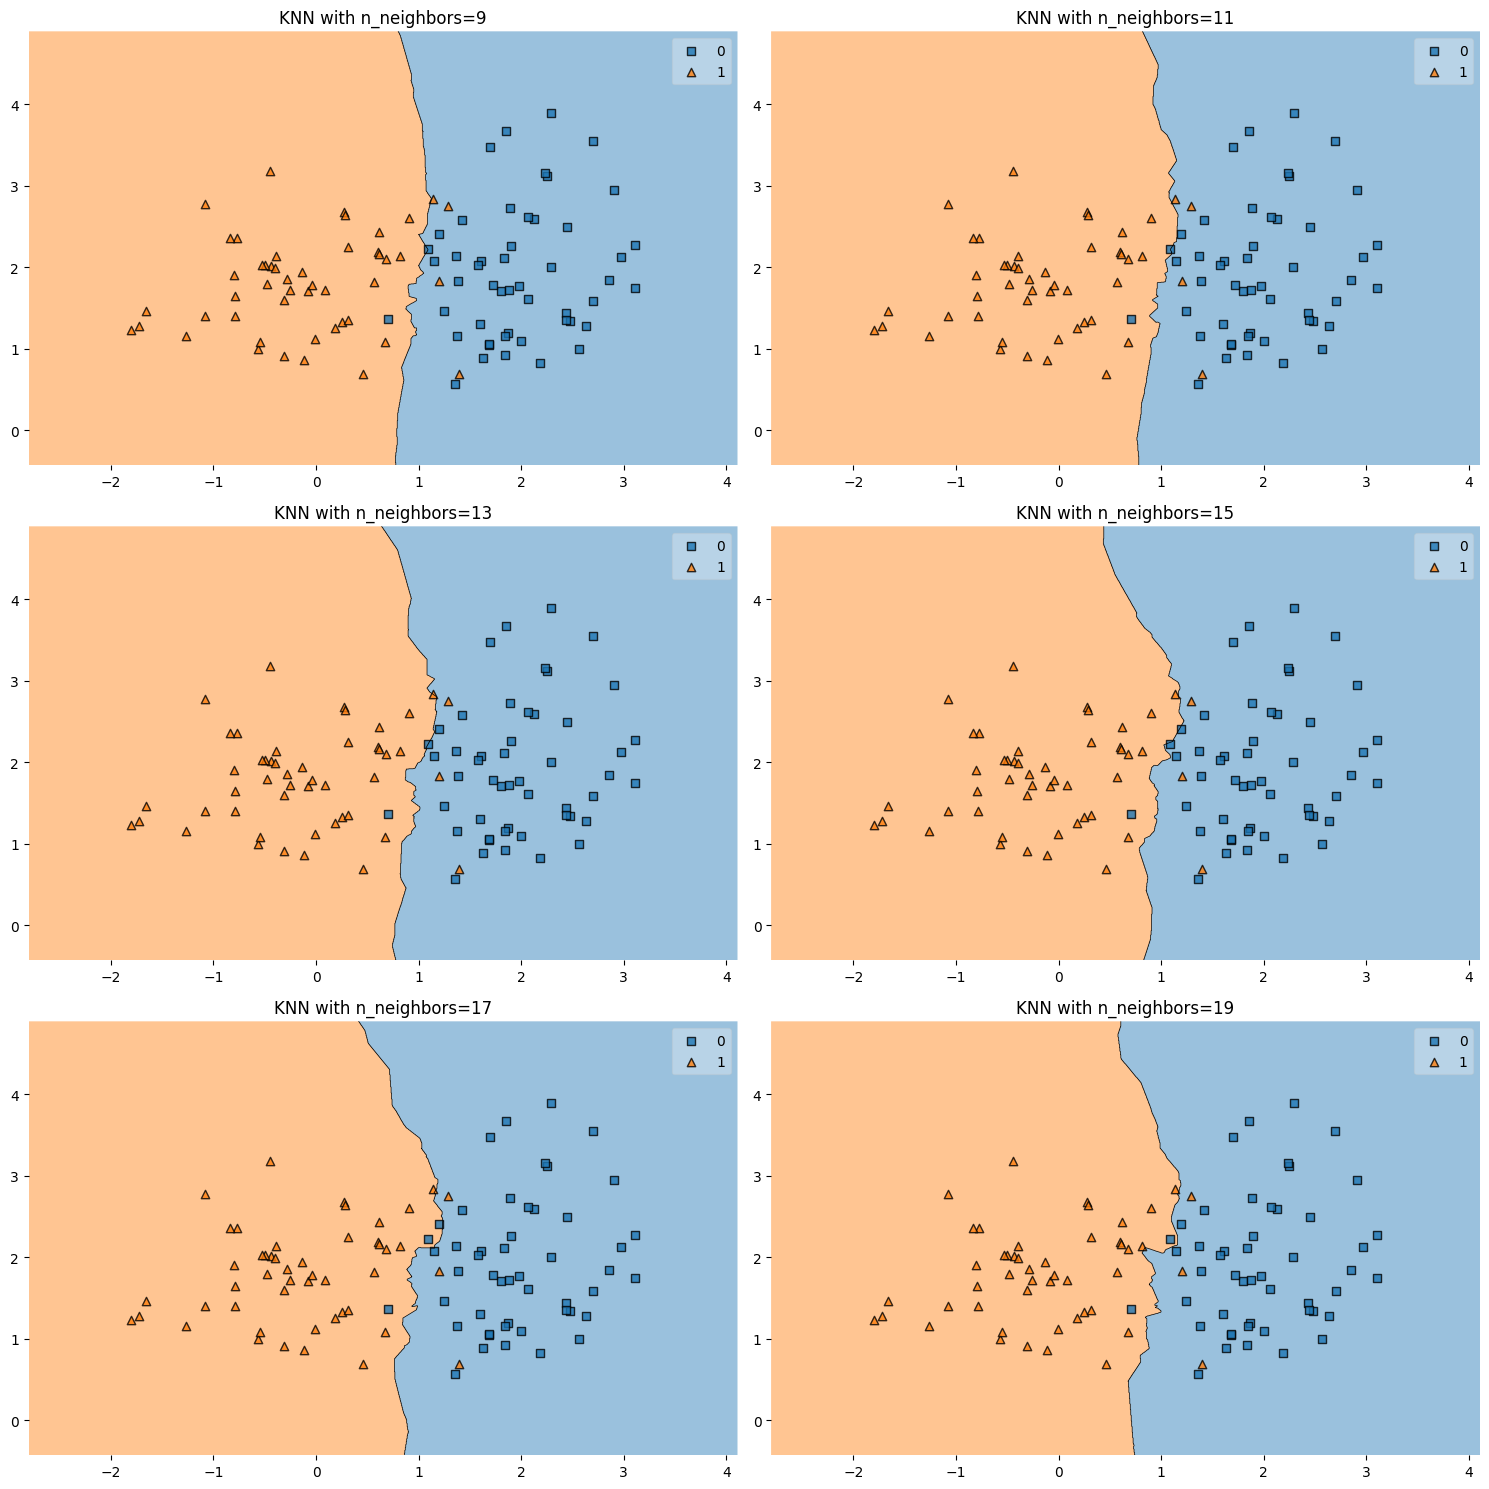

In [62]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'K vs accuracy')

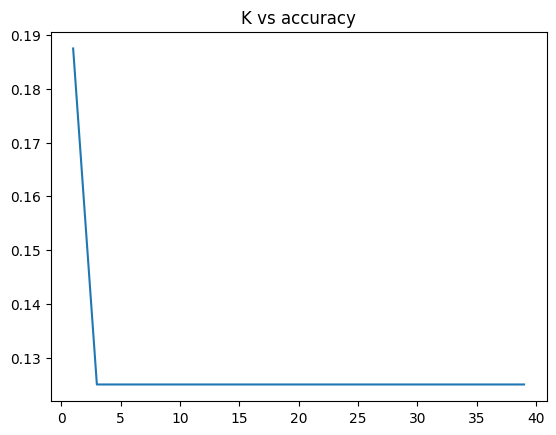

In [63]:
plt.plot(k1,err_cv)
plt.title("K vs accuracy")

In [15]:
df5=pd.read_csv("/content/5.outlier.csv")

In [16]:
df5=df5.rename(columns={"-17.89699968":"c1","7.662423364":"c2","0":"y1"})

In [17]:
fv=df5.iloc[:,0:2]
cv=df5.iloc[:,-1]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)










In [19]:
k=[]
acc=[]
err=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)


  k.append(i)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

Text(0.5, 1.0, 'k vs accuracy')

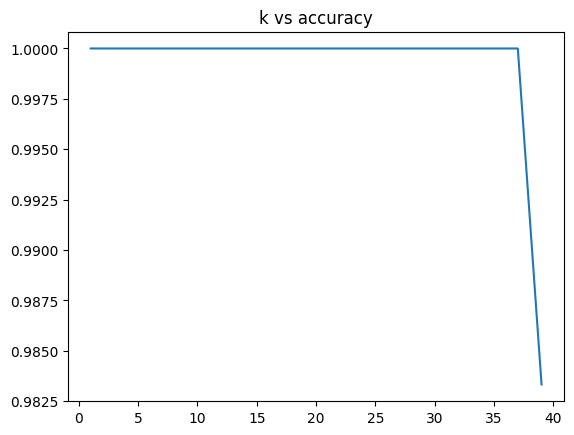

In [20]:
plt.plot(k,acc)
plt.title("k vs accuracy")

In [21]:
k1=[]
acc_cv=[]
err_cv=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)


  k1.append(i)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'K vs  accuracy')

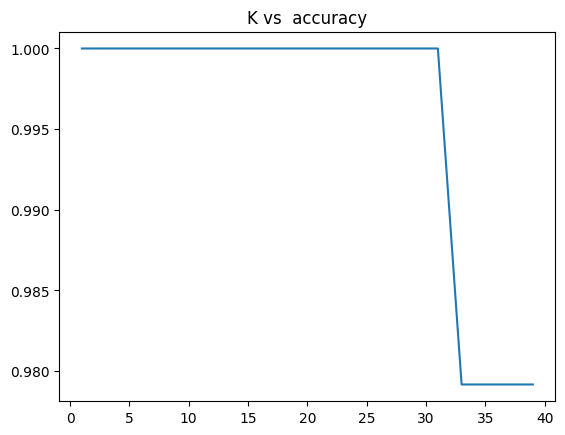

In [22]:
plt.plot(k1,acc_cv)
plt.title("K vs  accuracy")

**Here It is linear the accuracy score is max when  the k neighbor value is 15**

<Axes: >

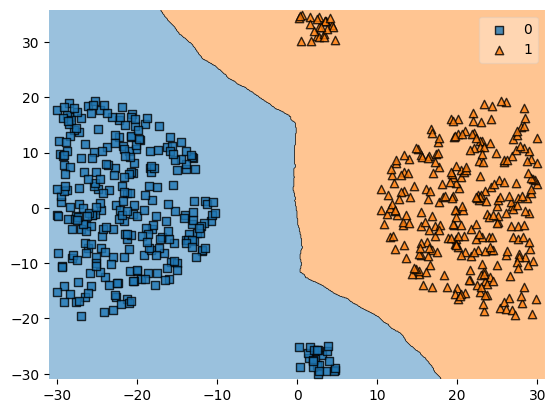

In [72]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

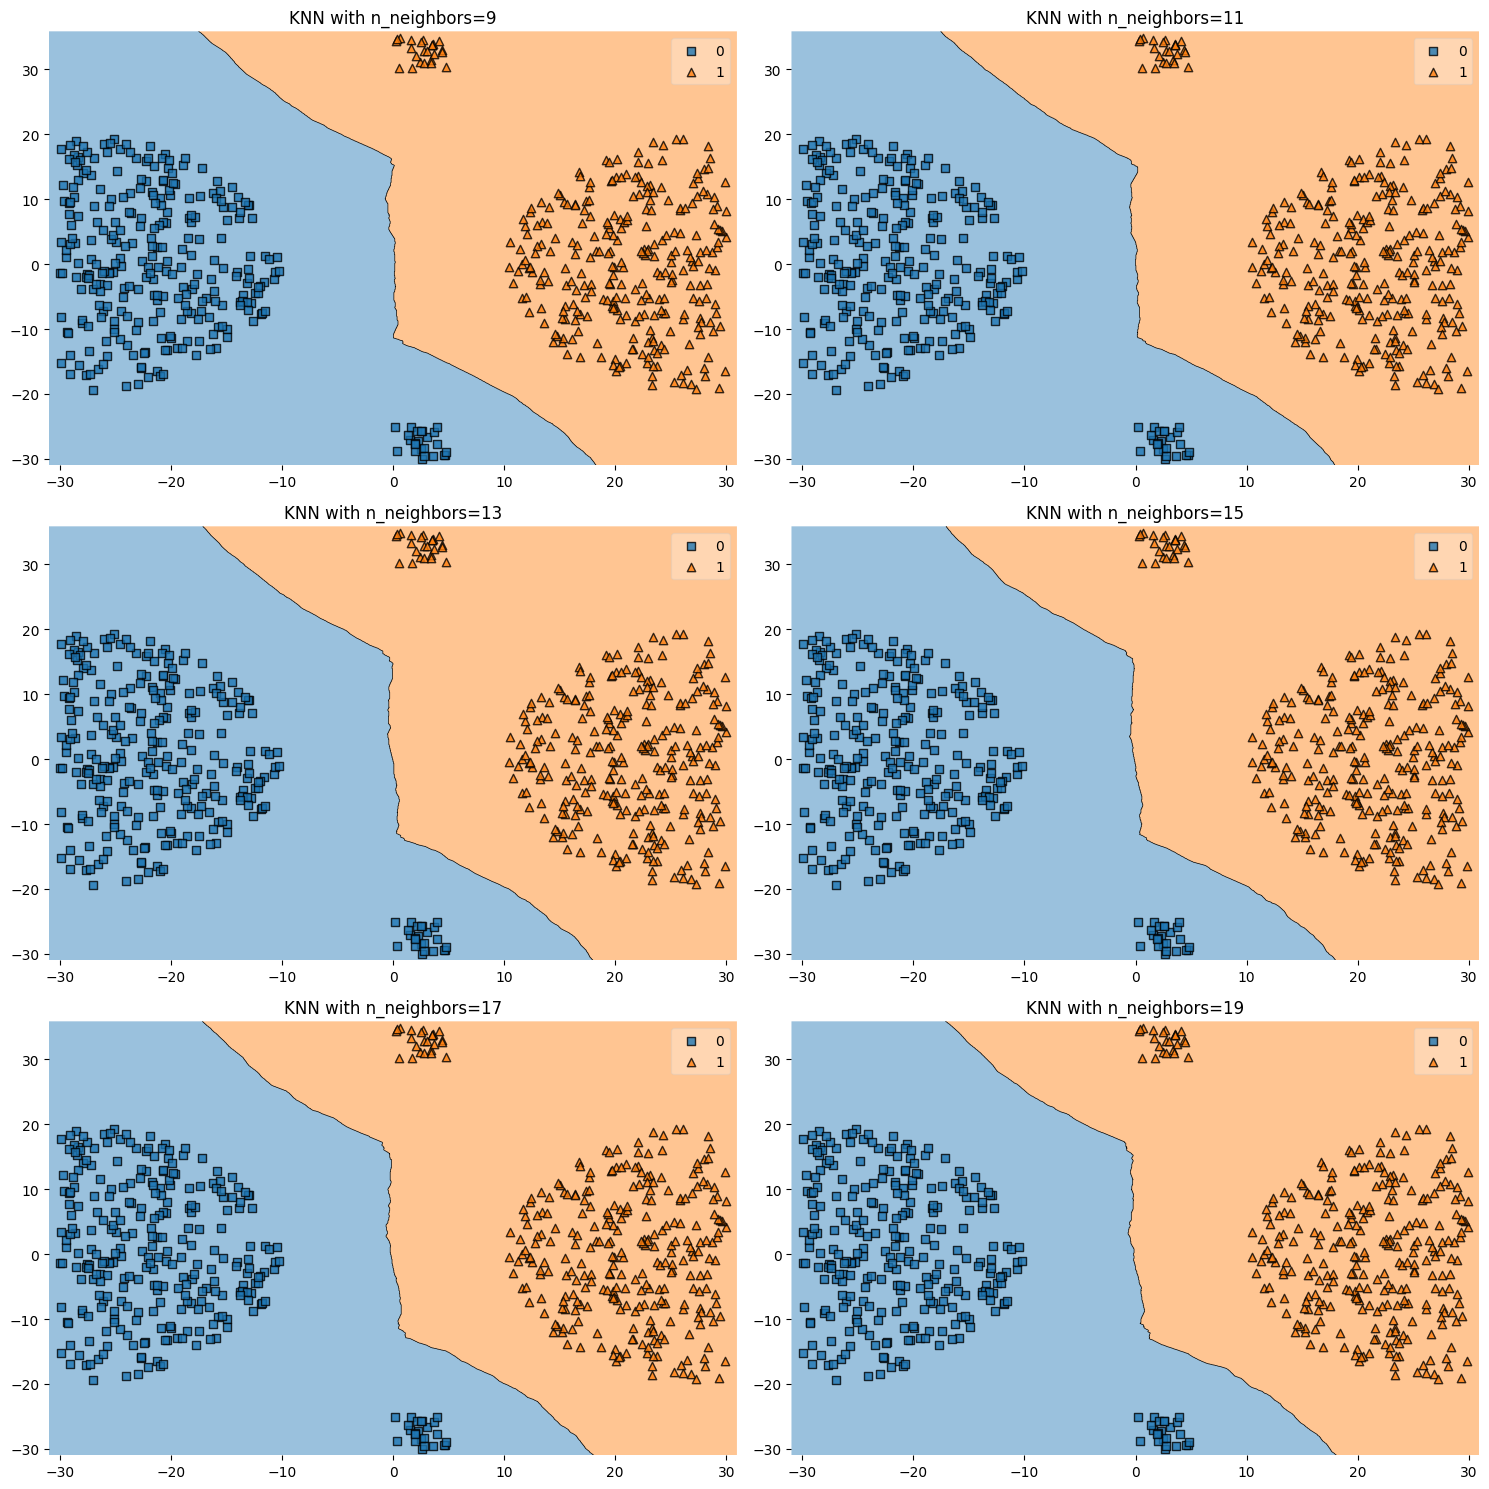

CPU times: user 12min 9s, sys: 21.5 s, total: 12min 31s
Wall time: 12min 47s


In [24]:
%%time
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(k1,err_cv)
plt.title("K vs error")

In [5]:
df6=pd.read_csv("/content/6.overlap.csv")

In [6]:
df6

7  3.2  0
0   6.4  3.2  0
1   6.9  3.1  0
2   5.5  2.3  0
3   6.5  2.8  0
4   5.7  2.8  0
..  ...  ... ..
94  6.7  3.0  1
95  6.3  2.5  1
96  6.5  3.0  1
97  6.2  3.4  1
98  5.9  3.0  1

[99 rows x 3 columns]

In [7]:
fv=df6.iloc[:,0:2]

In [8]:
cv=df6.iloc[:,-1]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [10]:
k=[]
acc=[]
err=[]
for i in range(1,80,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)


  k.append(i)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

In [ ]:
plt.plot(k,acc)

In [11]:
k1=[]
acc_cv=[]
err_cv=[]
for i in range(1,64,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)


  k1.append(i)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

In [ ]:
plt.plot(k1,acc_cv)

**Here It is(Overlapping) the accuracy score is max when  the k neighbor value is 15**

<Axes: >

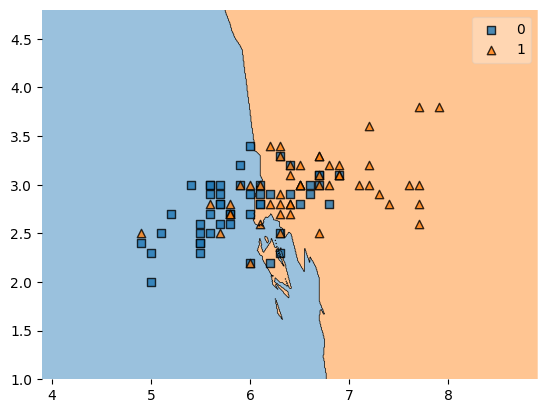

In [12]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)


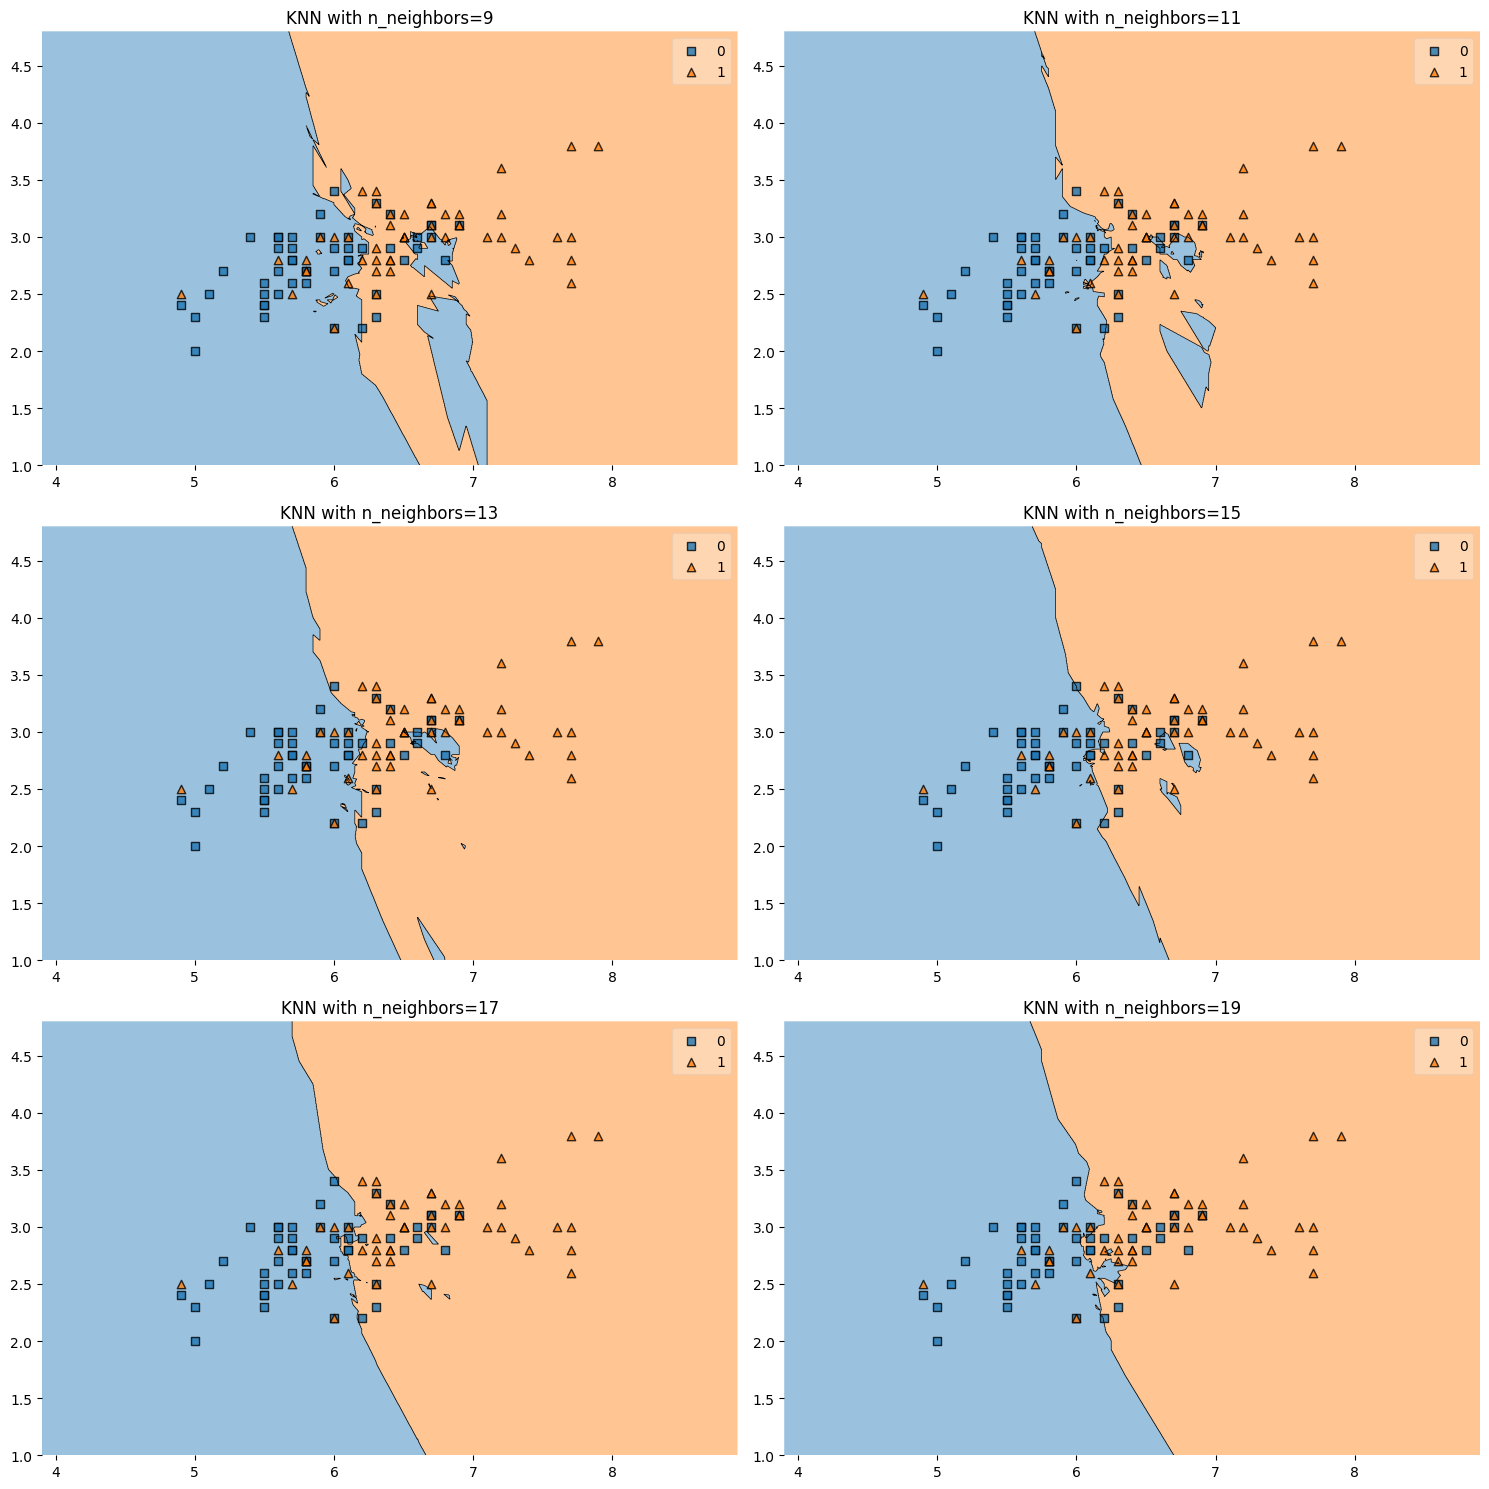

In [13]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

**Here the generalized accuracy score is max when kneighbor is 25**

In [ ]:
df7=pd.read_csv("/content/7.xor.csv")

In [ ]:
df7.info()

In [ ]:
fv=df7.iloc[:,0:2]

In [ ]:
cv=df7.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [ ]:
k=[]
err=[]
acc=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)



  k.append(i)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

In [ ]:
plt.plot(k,acc)

In [ ]:
k1=[]
err=[]
acc=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)



  k1.append(i)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

In [ ]:
k1=[]
err_cv=[]
acc_cv=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)



  k1.append(i)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

In [ ]:
plt.plot(k1,acc_cv)

Overlaping **Here the accuracy score is max when  the k neighbor value is 14**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

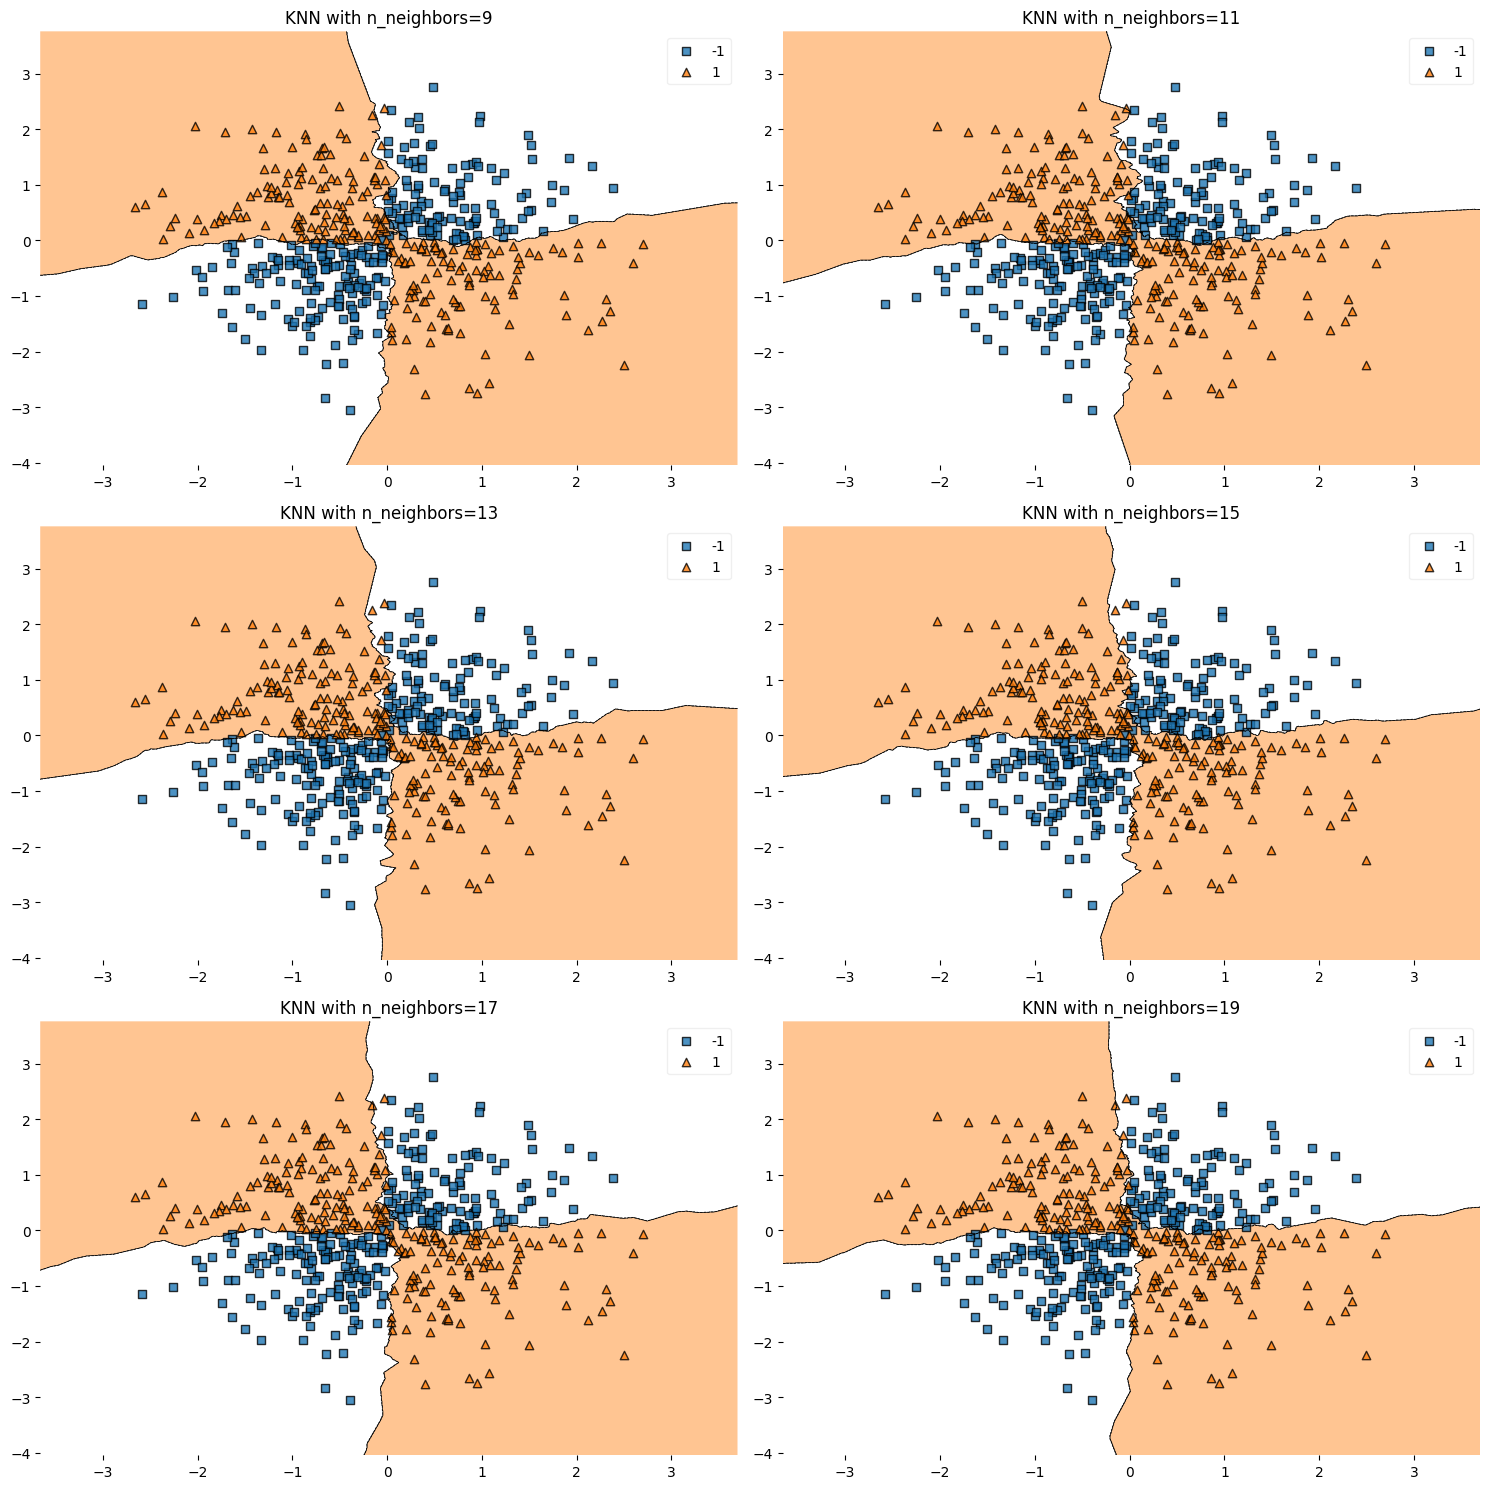

In [99]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [100]:
df8=pd.read_csv("/content/8.twospirals.csv")

In [101]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   -2.543456253616113  1999 non-null   float64
 1   -10.81635752298698  1999 non-null   float64
 2   0                   1999 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [102]:
fv=df8.iloc[:,0:2]
cv=df8.iloc[:,-1]

In [103]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [104]:
k=[]
acc=[]
err=[]
for i in range (1,100,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)

  k.append(i)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

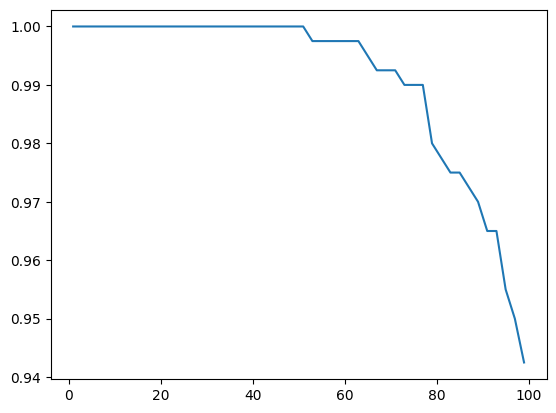

In [105]:
plt.plot(k,acc)

In [106]:
k1=[]
acc_cv=[]
err_cv=[]
for i in range (1,100,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)

  k1.append(i)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

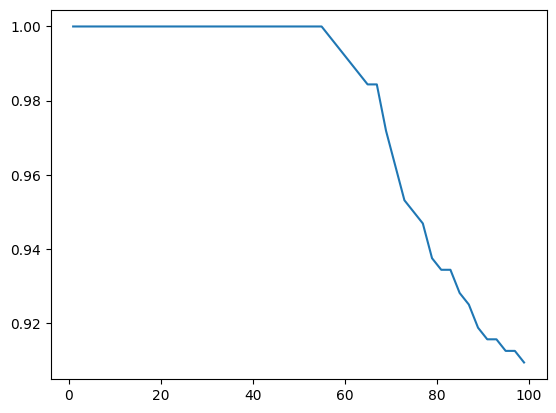

In [107]:
plt.plot(k1,acc_cv)


Here TWO SPIRALS accuracy_score is max when the kneighbor is 33 **bold text** **bold text**

<Axes: >

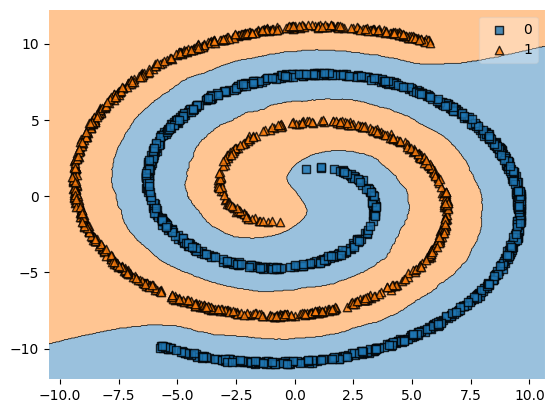

In [108]:
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

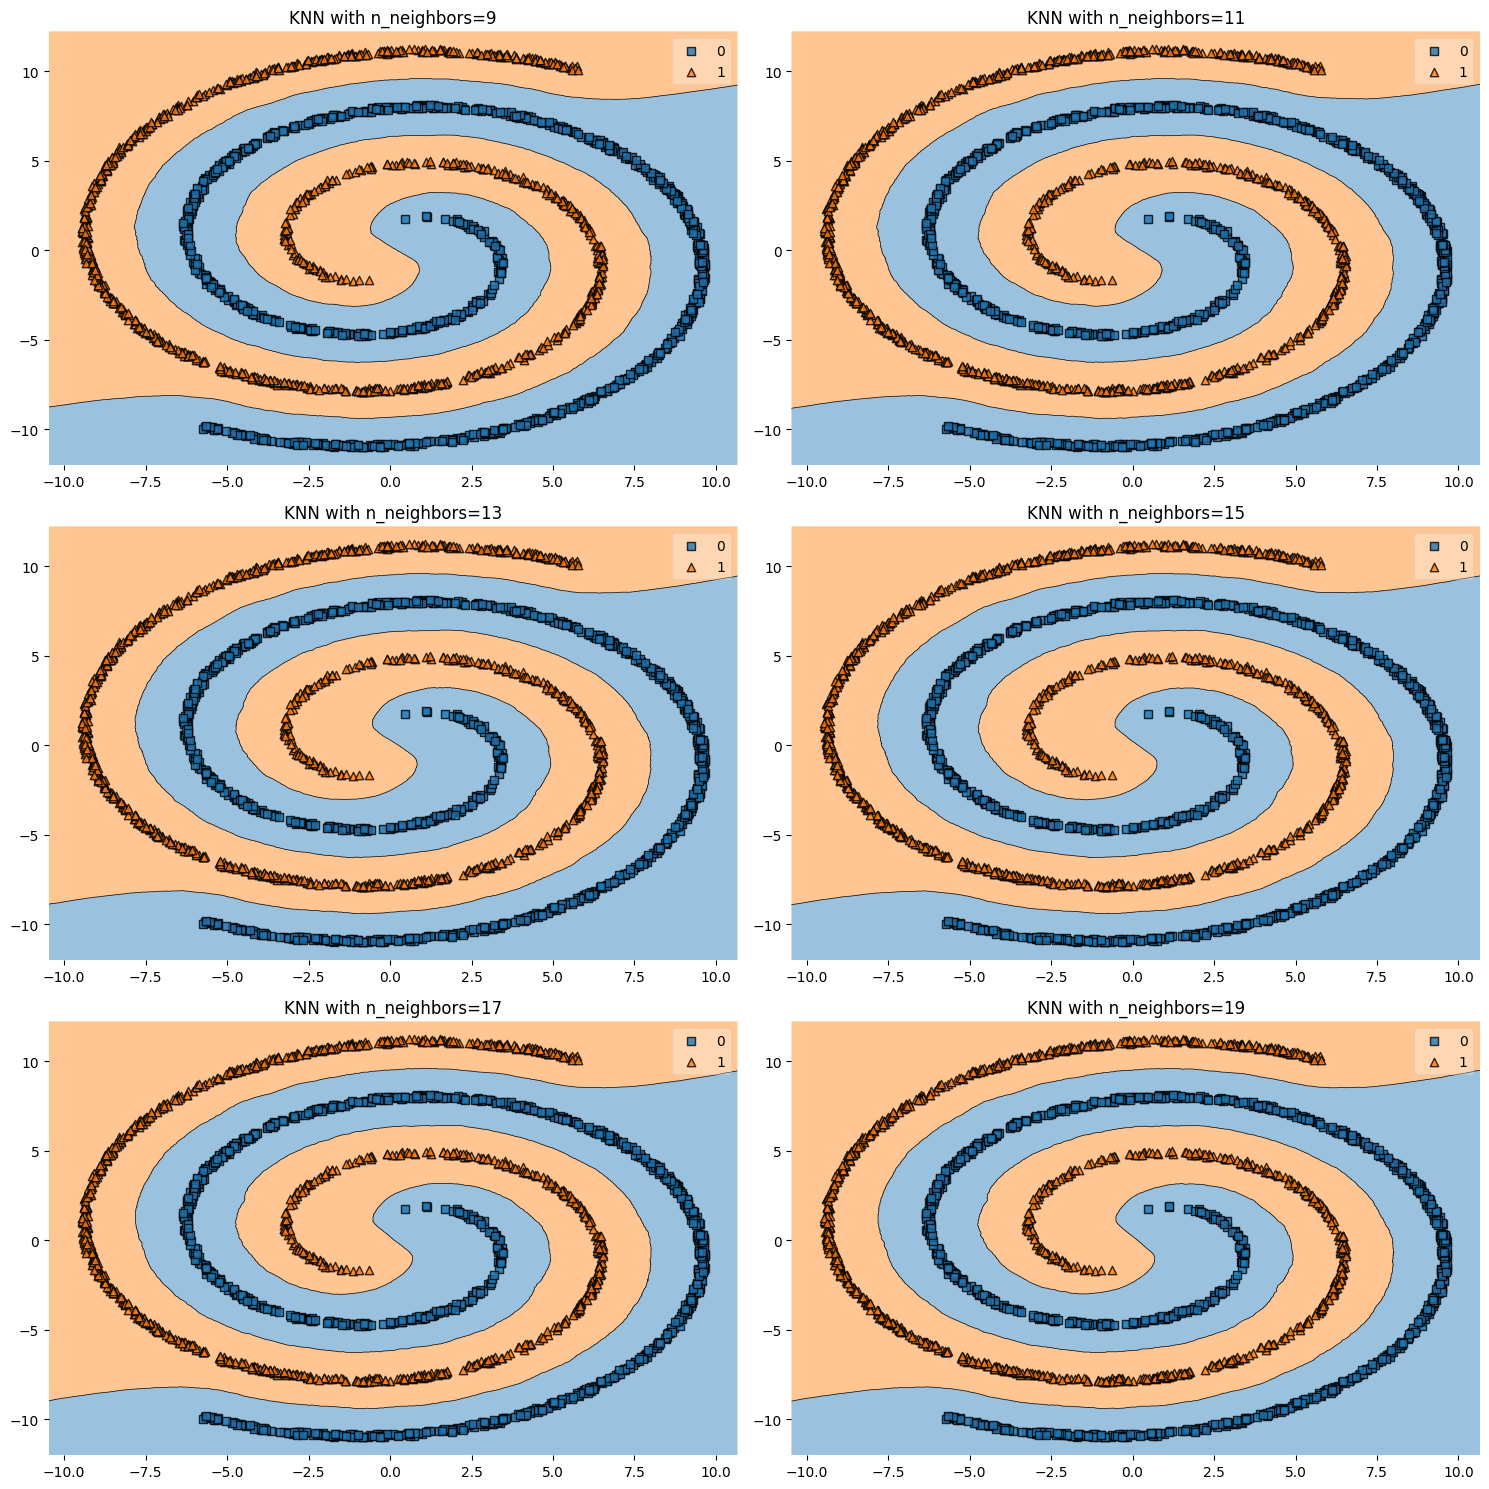

In [109]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(9, 20, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [25]:
df9=pd.read_csv("/content/9.random.csv")

In [26]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3.74E-01  399 non-null    float64
 1   1.08E+00  399 non-null    float64
 2   0.00E+00  399 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [27]:
fv=df9.iloc[:,0:2]
cv=df9.iloc[:,-1]


In [28]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)

In [29]:
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [30]:
k=[]
acc=[]
err=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)


  k.append(i)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

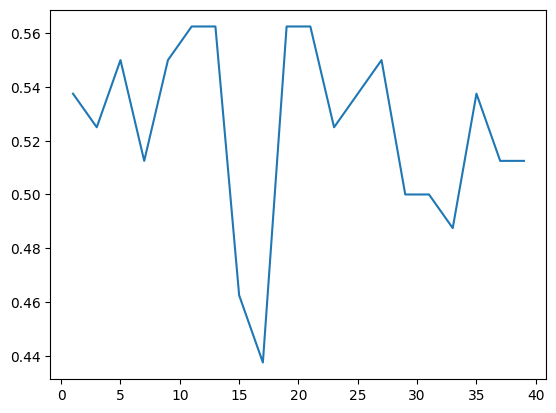

In [116]:
plt.plot(k,acc)

In [31]:
k1=[]
acc_cv=[]
err_cv=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)


  k1.append(i)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

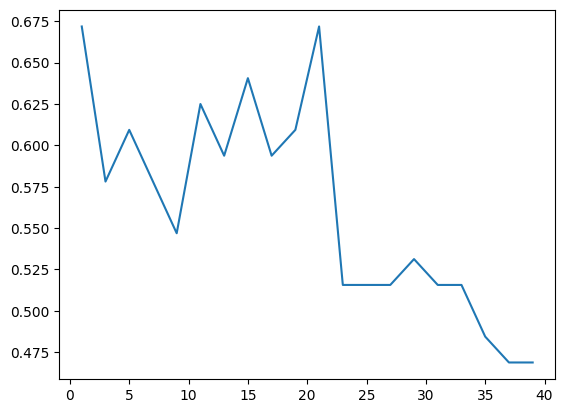

In [118]:
plt.plot(k1,acc_cv)

**Here the random the accuracy score is max when the kneighbor is 33**

<Axes: >

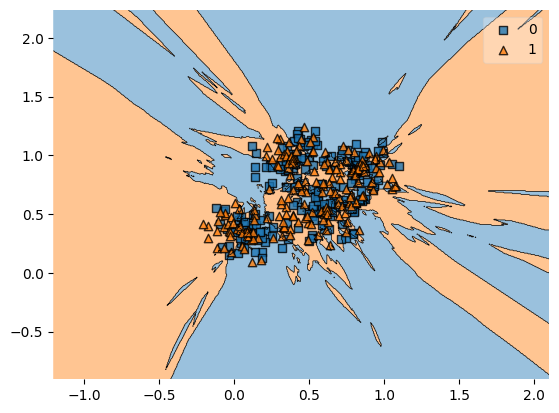

In [32]:
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(fv.values,(cv.values).astype(np.int_))
plot_decision_regions(X=fv.values,y=(cv.values).astype(np.int_),clf=knn)

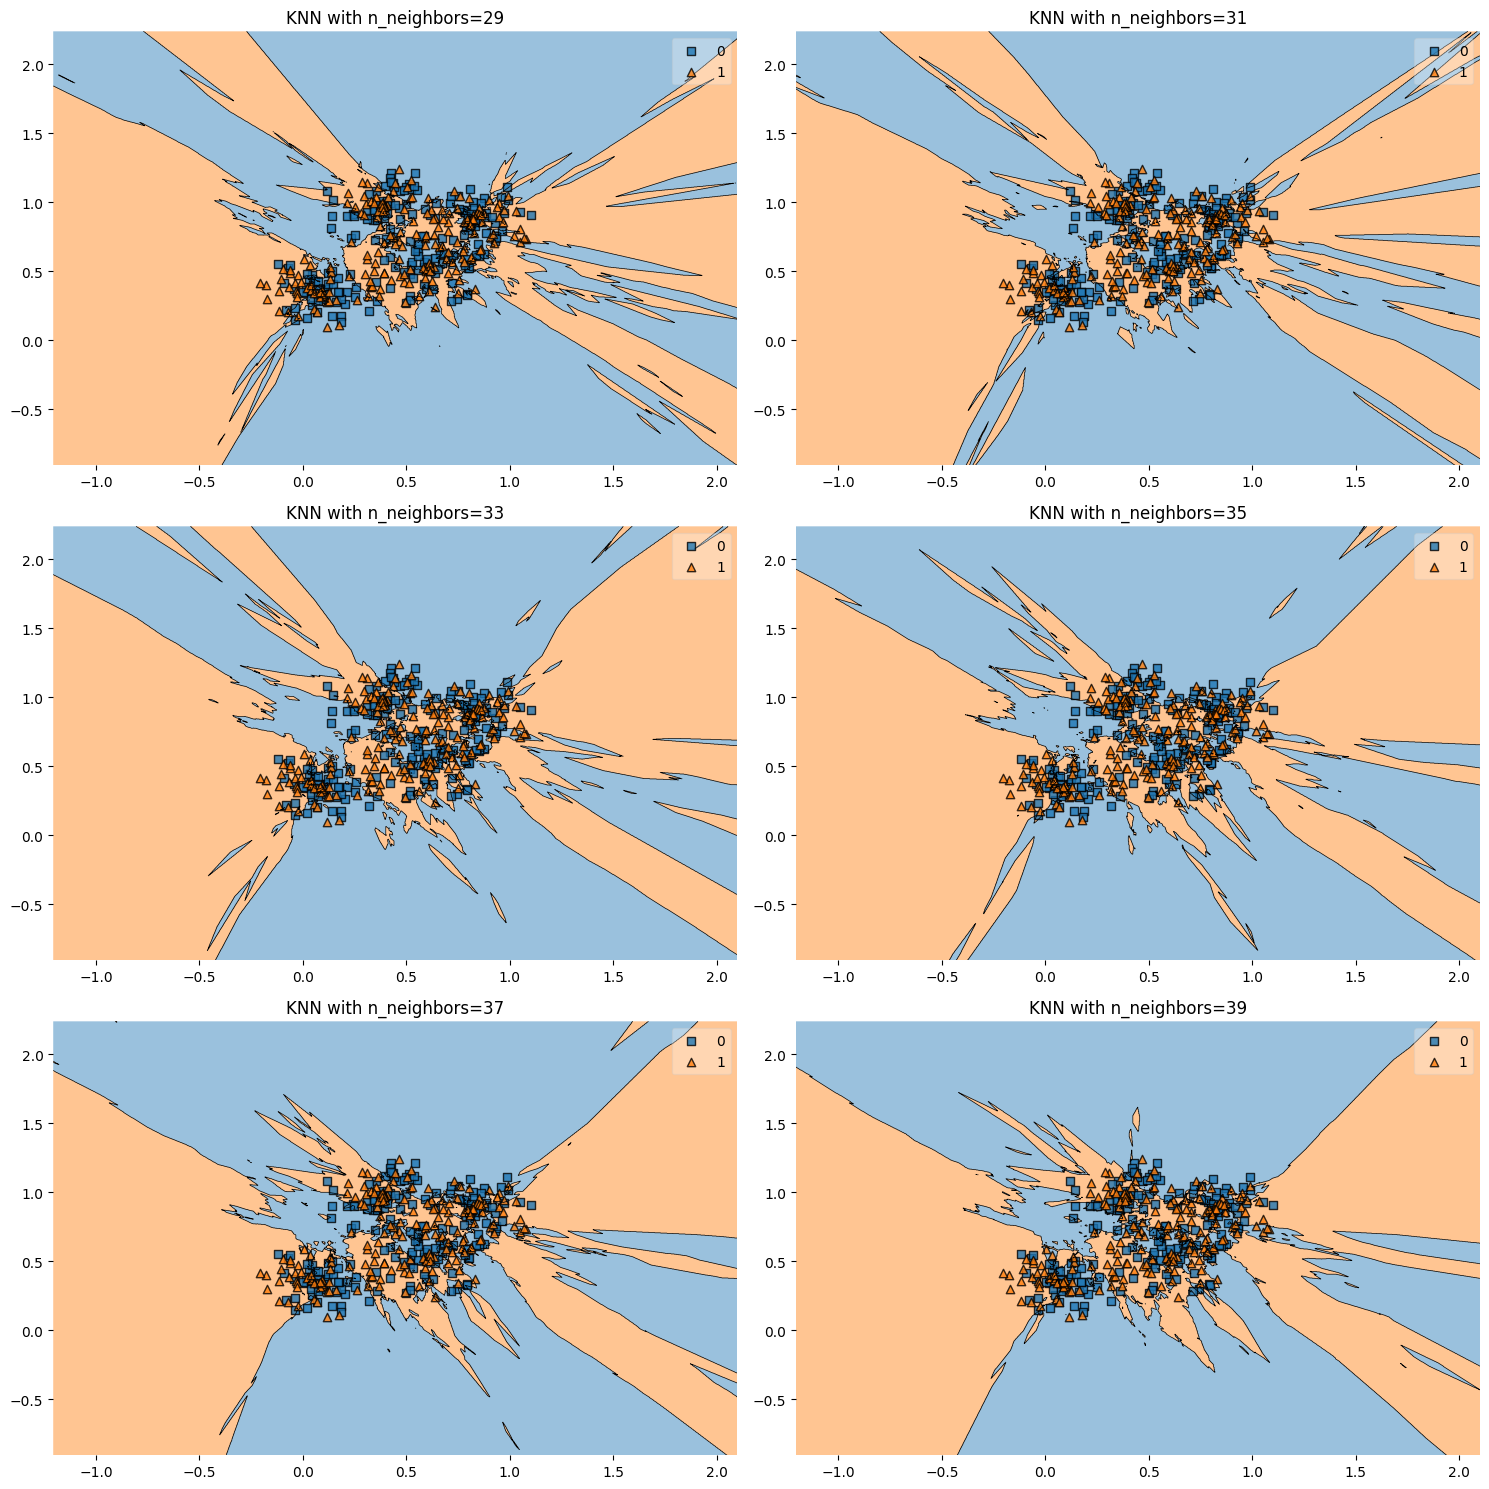

In [36]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(29, 40, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(fv.values, cv.astype(int))
    plot_decision_regions(X=fv.values, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(k,acc)
plt.plot(k1,acc_cv)